# Importing needed Packages

In [5]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

# Reading CSV file as weather_df and making date_time column as index of dataframe 
 

In [6]:
weather_df = pd.read_csv('kolkata.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)

,minTemp,maxTemp,tempC,dewPoint,humidity,heatIndex,windSpeed,windGust,windDirection,windChill,precipitation,precipitationCover,snowDepth,visibility,cloudCover,sealevelPressure
date_time,,,,,,,,,,,,,,,,
01-01-2017,14.0,25.3,19.9,16.5,82.47,0.0,5.8,0.0,78.33,0.0,0.0,0.0,0,1.2,4.9,1015.9
02-01-2017,16.0,26.0,20.6,16.0,76.76,0.0,8.1,0.0,148.54,0.0,0.0,0.0,0,1.4,0.3,1015.6
03-01-2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,0.0,244.92,0.0,0.0,0.0,0,1.6,10.7,1014.7
04-01-2017,16.0,25.0,19.9,14.5,72.57,0.0,8.1,0.0,244.38,0.0,0.0,0.0,0,1.8,2.3,1014.6
05-01-2017,15.0,25.6,19.6,13.7,71.88,0.0,8.1,0.0,231.58,0.0,0.0,0.0,0,1.9,0.0,1013.7


# Checking columns in our dataframe

In [7]:
weather_df.columns

Index(['minTemp', 'maxTemp', 'tempC', 'dewPoint', 'humidity', 'heatIndex',
       'windSpeed', 'windGust', 'windDirection', 'windChill', 'precipitation',
       'precipitationCover', 'snowDepth', 'visibility', 'cloudCover',
       'sealevelPressure'],
      dtype='object')

## Now Shape

In [8]:
weather_df.shape

(2191, 16)

In [9]:
weather_df.describe()

,minTemp,maxTemp,tempC,dewPoint,humidity,heatIndex,windSpeed,windGust,windDirection,windChill,precipitation,precipitationCover,snowDepth,visibility,cloudCover,sealevelPressure
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.0,2191.000000,2191.000000,2191.000000
mean,22.736604,31.397490,26.677088,21.713555,76.298530,34.144957,11.272980,1.240438,154.037335,0.051803,4.492268,4.169220,0.0,2.022821,41.431858,1007.308261
std,5.228905,4.135988,4.415869,5.510843,10.249919,16.263659,6.163396,6.084408,52.448529,0.672741,13.268362,6.330994,0.0,0.334513,27.920853,22.336313
min,9.000000,18.000000,14.200000,5.800000,41.150000,0.000000,3.400000,0.000000,20.950000,0.000000,0.000000,0.000000,0.0,0.700000,0.000000,0.000000
25%,19.000000,29.000000,23.600000,17.100000,69.075000,29.300000,8.100000,0.000000,115.960000,0.000000,0.000000,0.000000,0.0,1.800000,14.900000,1003.000000
50%,25.000000,32.000000,28.300000,24.000000,77.080000,39.500000,10.300000,0.000000,156.130000,0.000000,0.000000,0.000000,0.0,2.100000,45.100000,1007.900000
75%,27.000000,34.600000,30.000000,26.300000,84.220000,45.300000,13.900000,0.000000,191.020000,0.000000,1.675000,8.330000,0.0,2.300000,63.600000,1012.800000
max,30.500000,41.000000,34.800000,30.100000,97.230000,61.200000,123.300000,55.300000,331.380000,9.600000,232.770000,34.780000,0.0,3.200000,100.000000,1019.700000


# Checking is there any null values in dataset

In [10]:
weather_df.isnull().any()

minTemp               False
maxTemp               False
tempC                 False
dewPoint              False
humidity              False
heatIndex             False
windSpeed             False
windGust              False
windDirection         False
windChill             False
precipitation         False
precipitationCover    False
snowDepth             False
visibility            False
cloudCover            False
sealevelPressure      False
dtype: bool

## Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.

In [11]:
print(weather_df.columns)

Index(['minTemp', 'maxTemp', 'tempC', 'dewPoint', 'humidity', 'heatIndex',
       'windSpeed', 'windGust', 'windDirection', 'windChill', 'precipitation',
       'precipitationCover', 'snowDepth', 'visibility', 'cloudCover',
       'sealevelPressure'],
      dtype='object')


In [12]:
weather_df_num=weather_df.loc[:,['maxTemp','minTemp','tempC','dewPoint', 'precipitation', 'cloudCover','humidity','heatIndex', 'sealevelPressure','windSpeed', 'windDirection']]
weather_df_num.head(5)

,maxTemp,minTemp,tempC,dewPoint,precipitation,cloudCover,humidity,heatIndex,sealevelPressure,windSpeed,windDirection
date_time,,,,,,,,,,,
01-01-2017,25.3,14.0,19.9,16.5,0.0,4.9,82.47,0.0,1015.9,5.8,78.33
02-01-2017,26.0,16.0,20.6,16.0,0.0,0.3,76.76,0.0,1015.6,8.1,148.54
03-01-2017,27.0,16.0,21.1,15.6,0.0,10.7,73.12,27.3,1014.7,9.2,244.92
04-01-2017,25.0,16.0,19.9,14.5,0.0,2.3,72.57,0.0,1014.6,8.1,244.38
05-01-2017,25.6,15.0,19.6,13.7,0.0,0.0,71.88,0.0,1013.7,8.1,231.58


# Shape of new Dataframe

In [13]:
weather_df_num.shape

(2191, 11)

## Columns in new Dataframe

In [14]:
weather_df_num.columns

Index(['maxTemp', 'minTemp', 'tempC', 'dewPoint', 'precipitation',
       'cloudCover', 'humidity', 'heatIndex', 'sealevelPressure', 'windSpeed',
       'windDirection'],
      dtype='object')

## Ploting all the column values

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>], dtype=object)

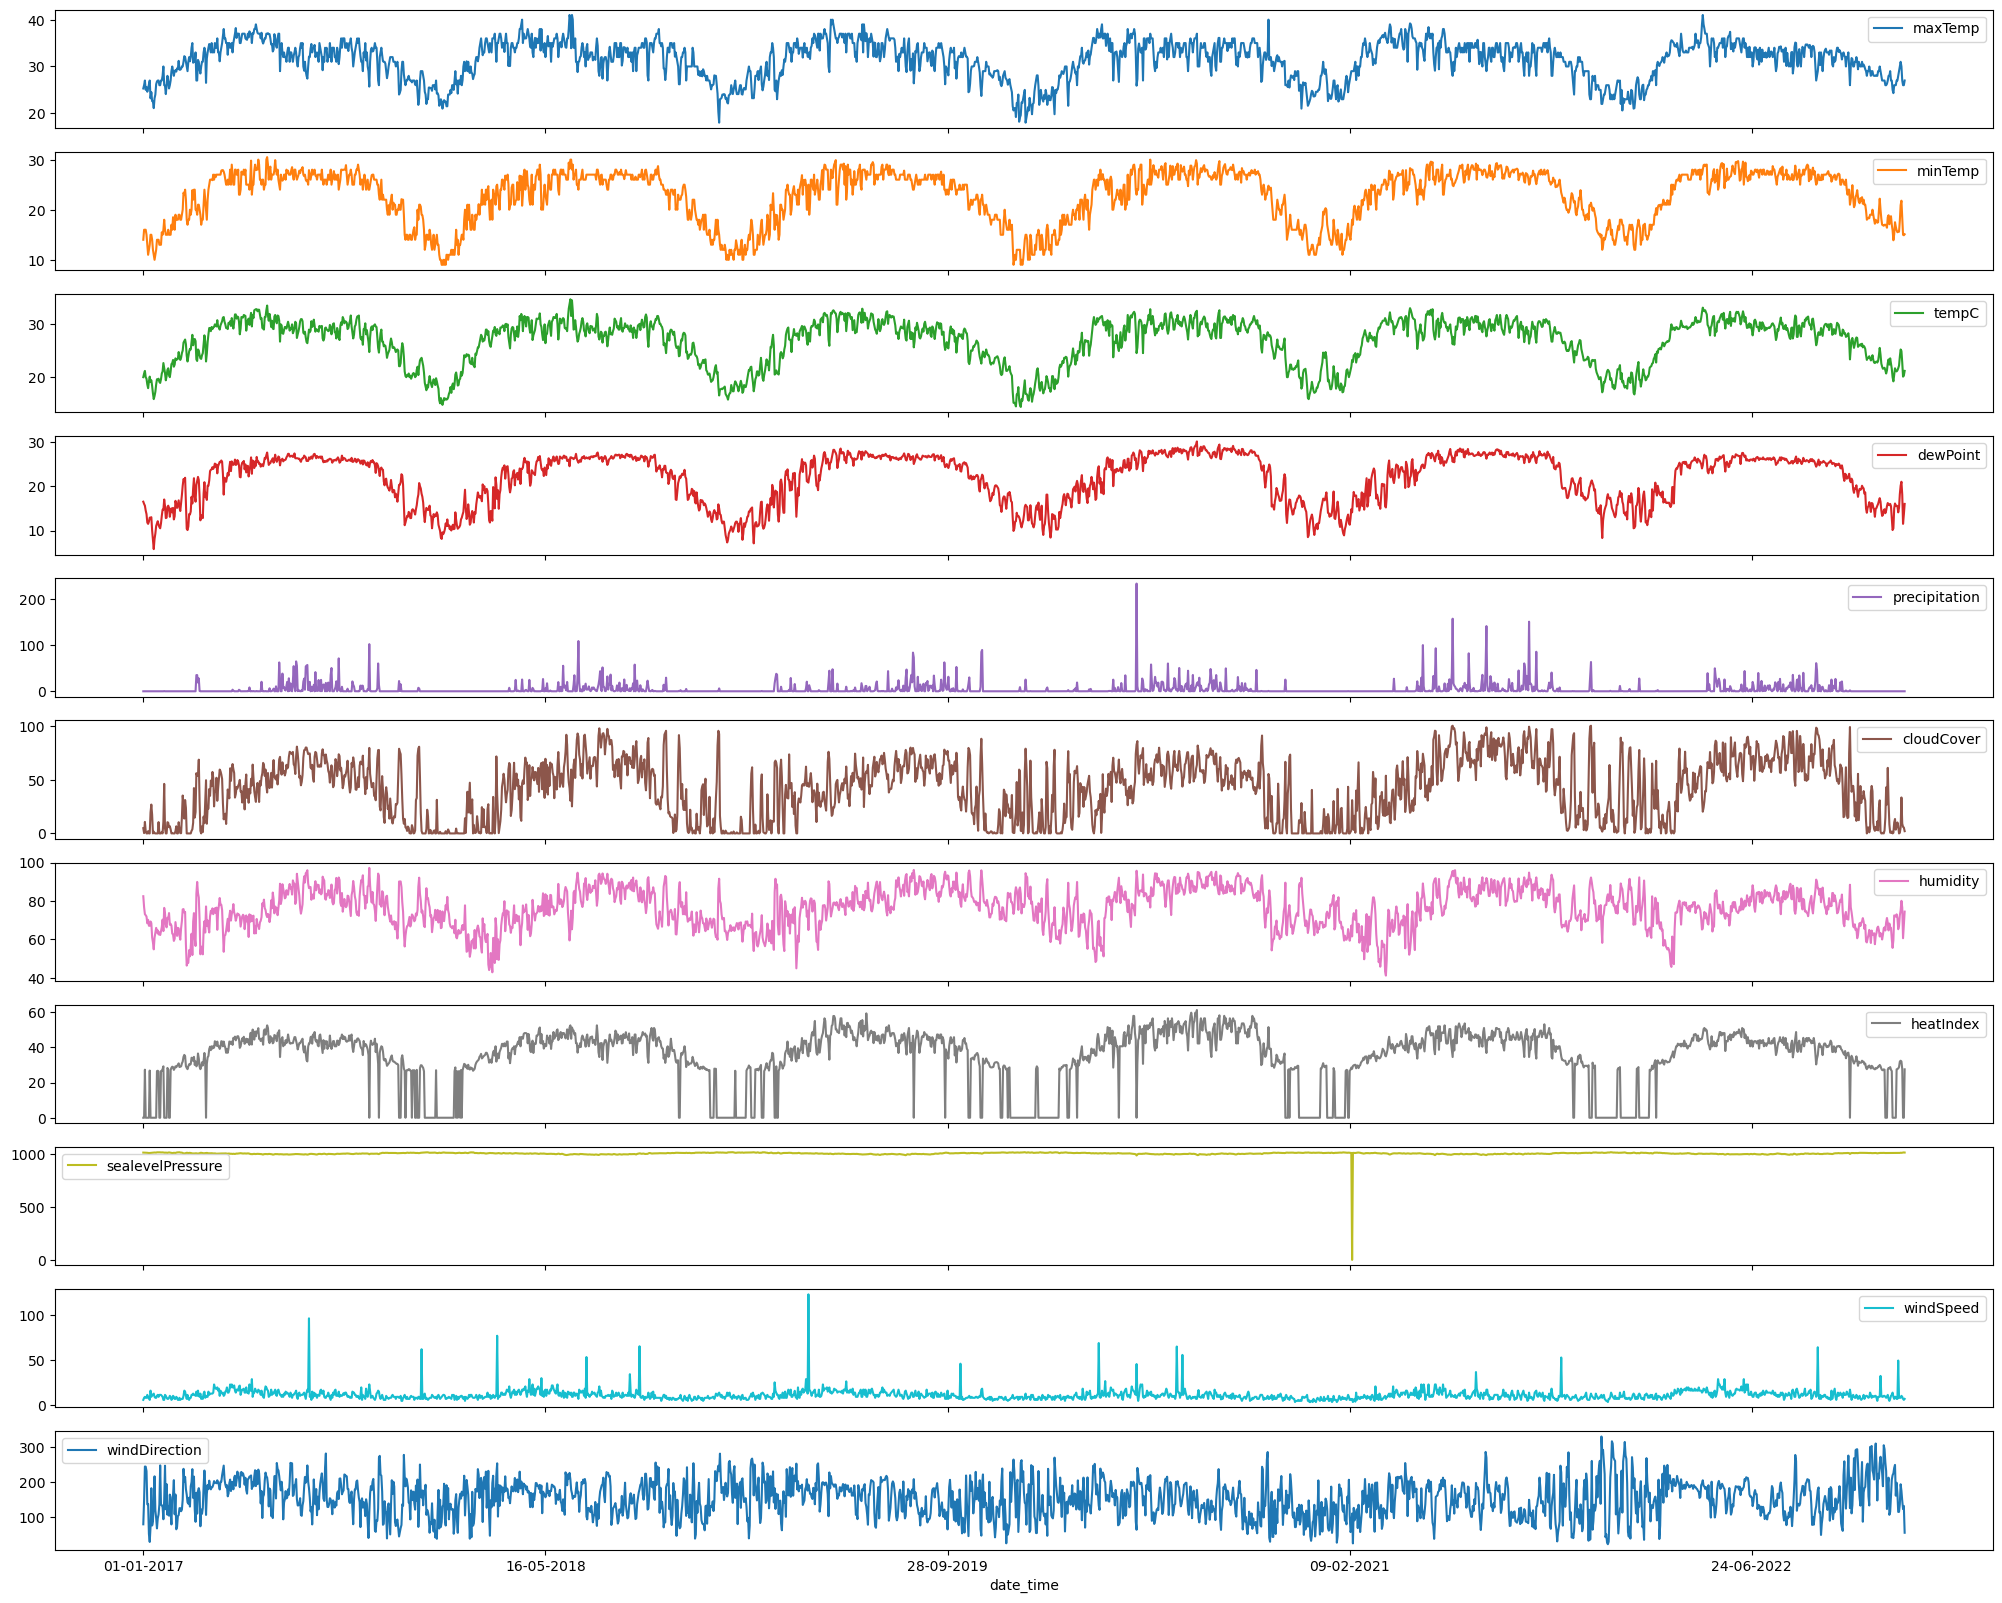

In [15]:
weather_df_num.plot(subplots=True, figsize=(25,20))

# Ploting all the column values for 1 year

In [16]:
weather_df.get('date_time', default = "default")

'default'


### Converting the index to datetime

In [17]:
weather_df_num.index = pd.to_datetime(weather_df_num.index, dayfirst=True)


In [18]:
print(f"Date range in the DataFrame: {weather_df_num.index.min()} to {weather_df_num.index.max()}")

Date range in the DataFrame: 2017-01-01 00:00:00 to 2022-12-31 00:00:00


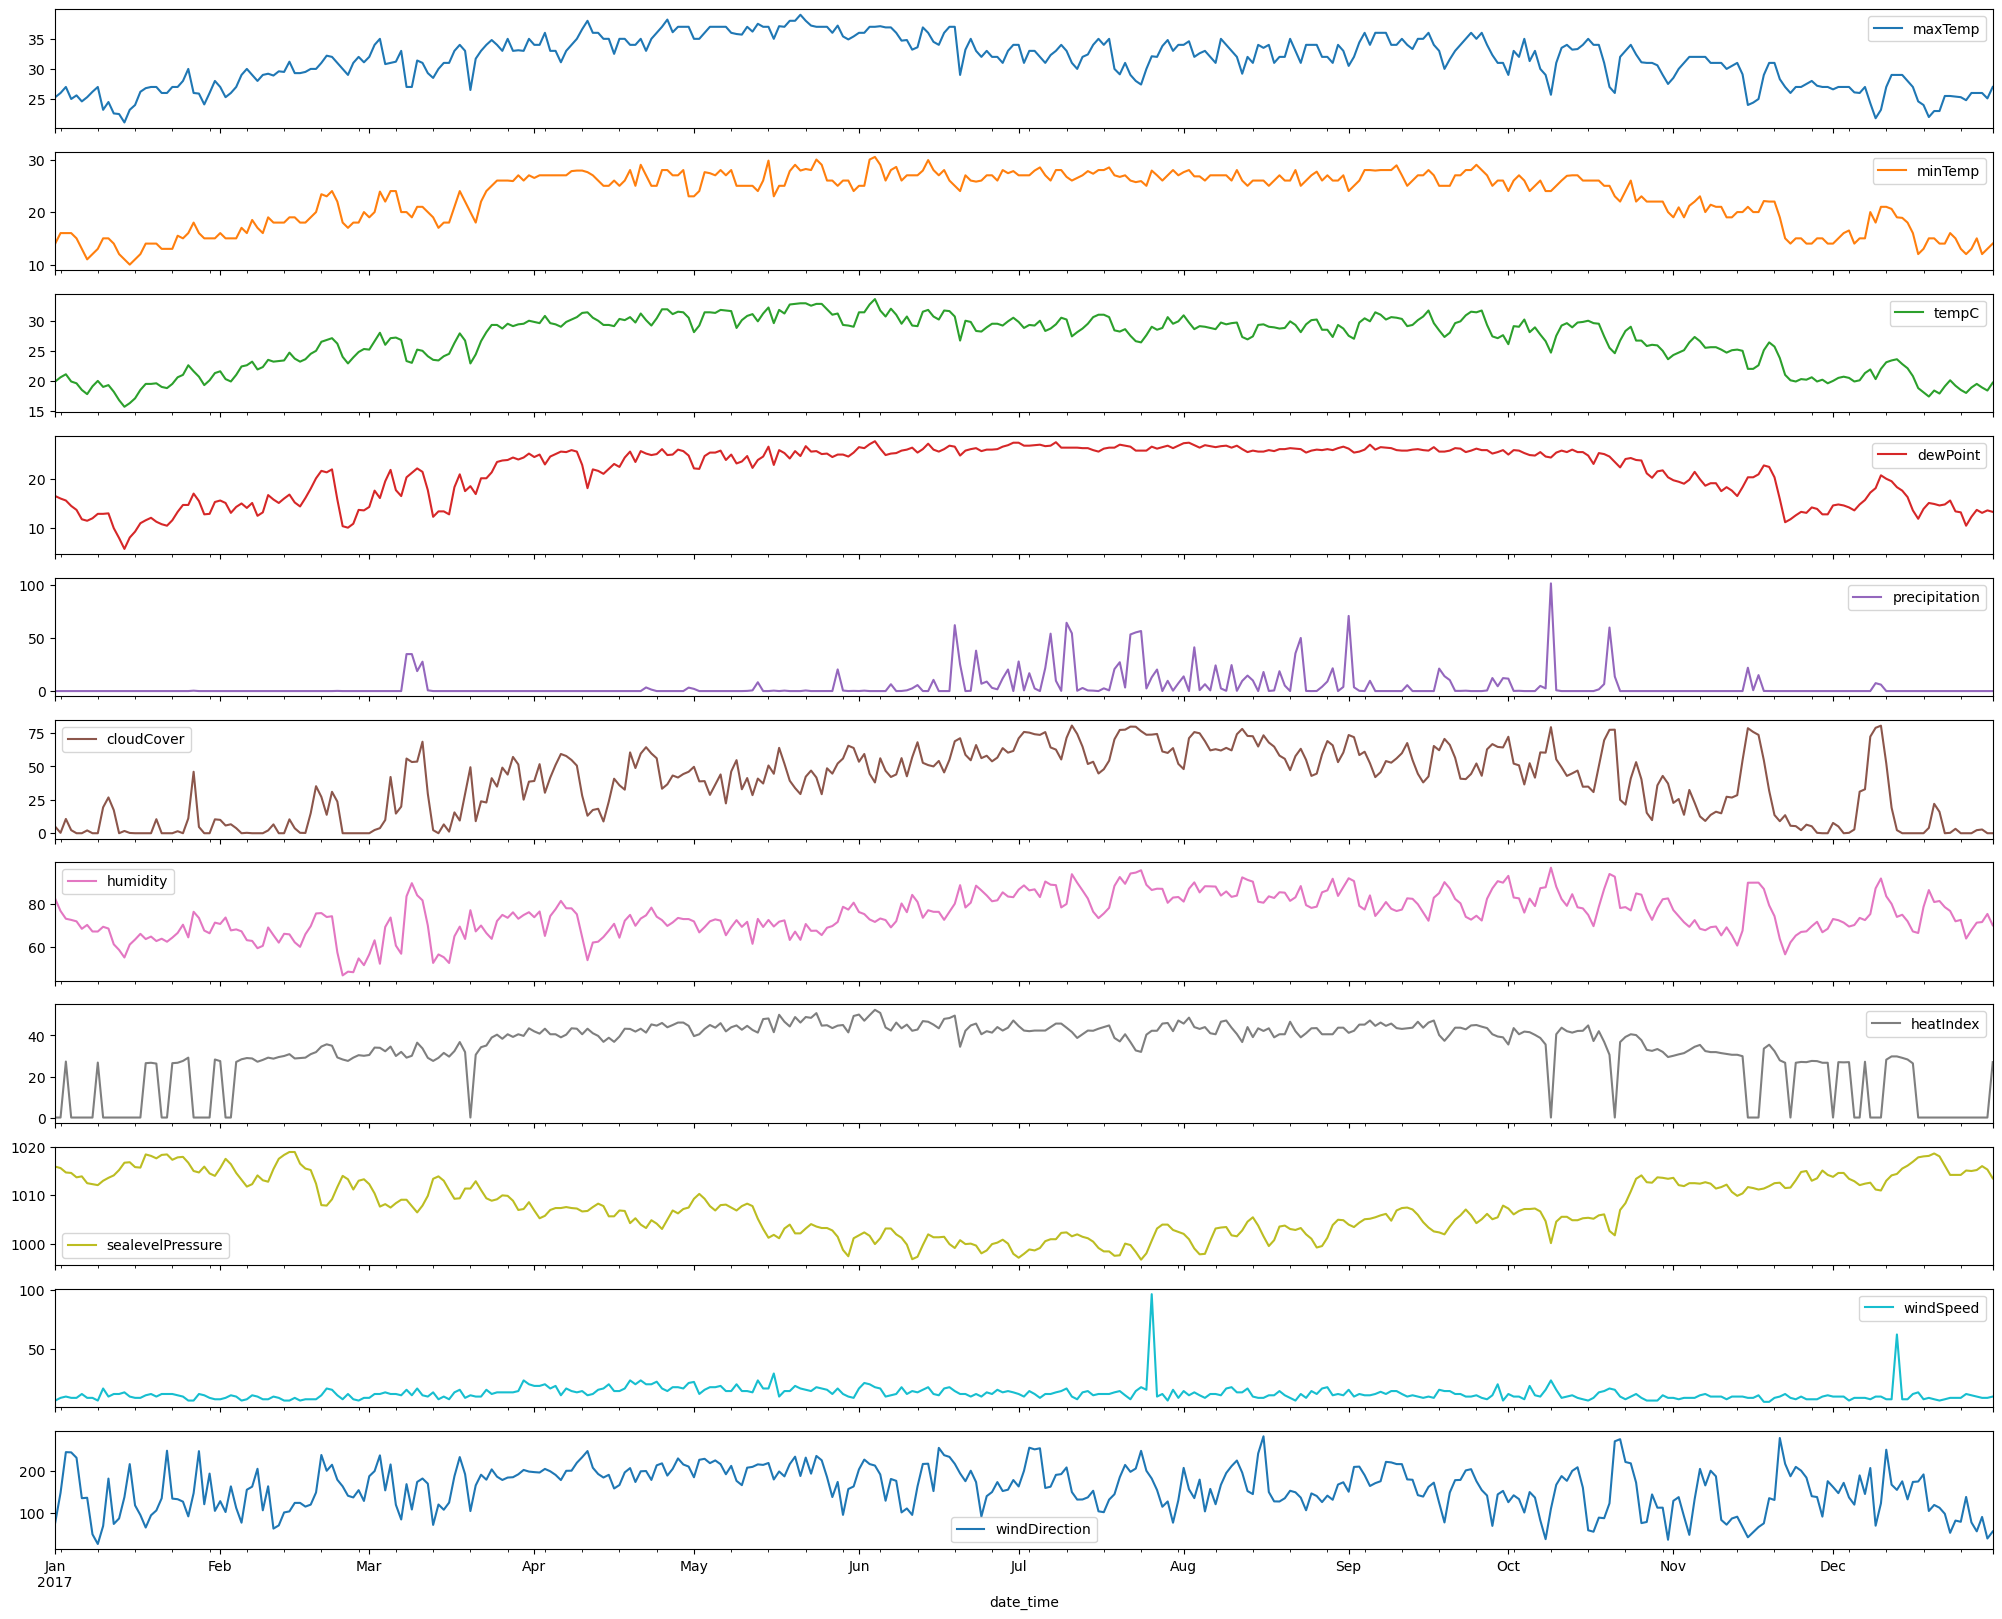

In [19]:
weather_df_num['2017-01-01':'2017-12-31'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25, 20))
plt.show()

array([[<Axes: title={'center': 'maxTemp'}>,
        <Axes: title={'center': 'minTemp'}>,
        <Axes: title={'center': 'tempC'}>],
       [<Axes: title={'center': 'dewPoint'}>,
        <Axes: title={'center': 'precipitation'}>,
        <Axes: title={'center': 'cloudCover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'heatIndex'}>,
        <Axes: title={'center': 'sealevelPressure'}>],
       [<Axes: title={'center': 'windSpeed'}>,
        <Axes: title={'center': 'windDirection'}>, <Axes: >]],
      dtype=object)

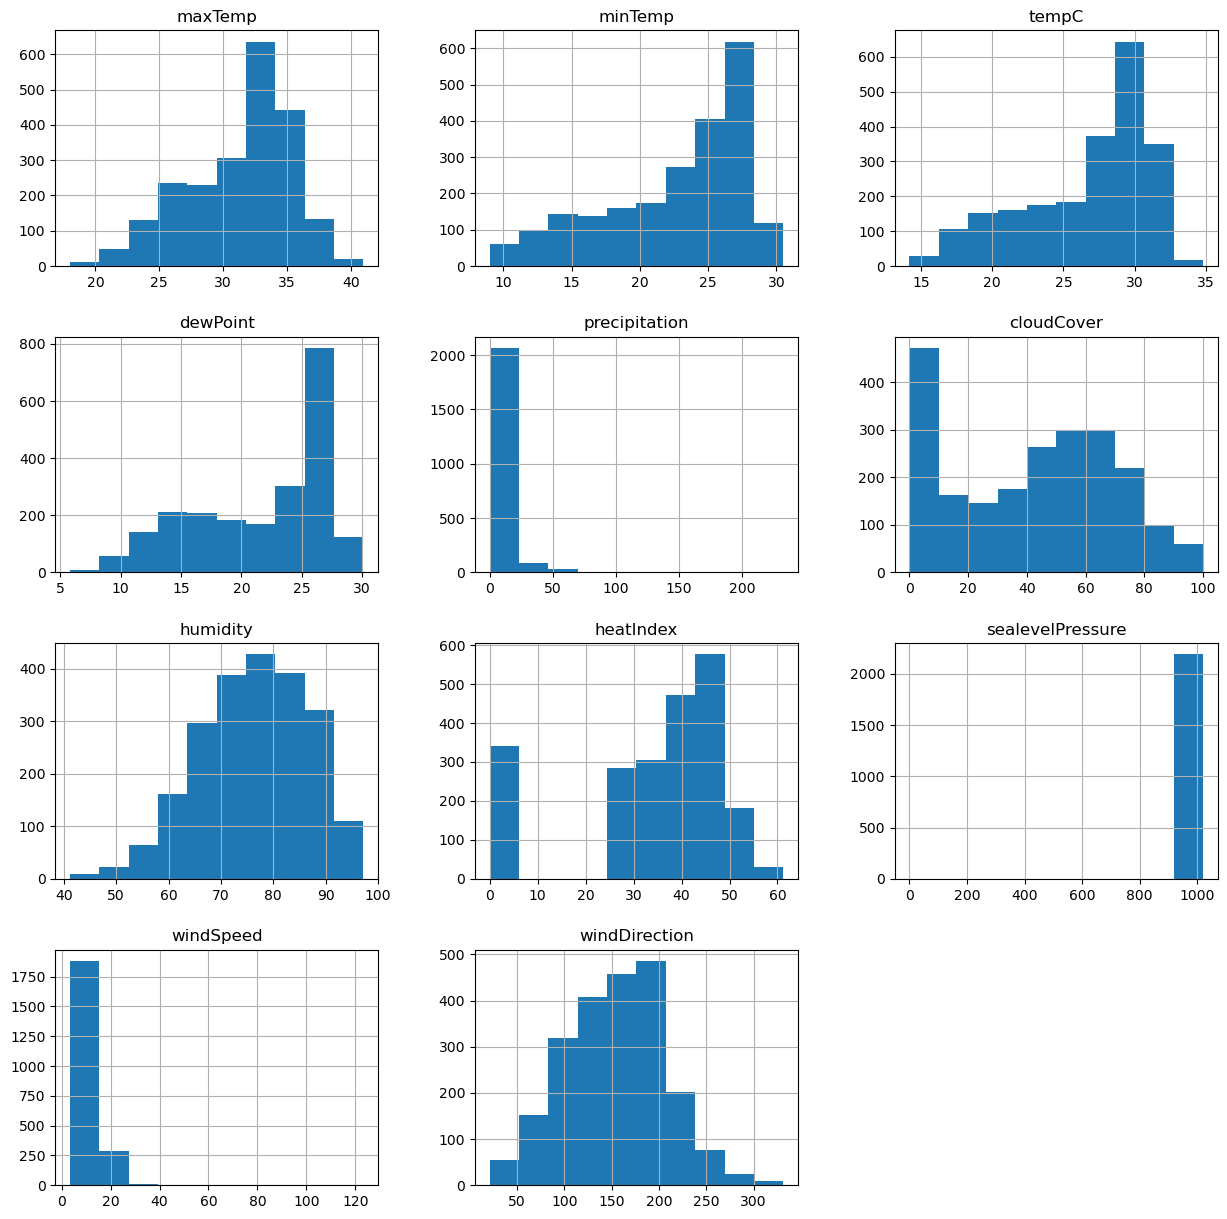

In [20]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [21]:
weth=weather_df_num['2019':'2020']
weth.head()

,maxTemp,minTemp,tempC,dewPoint,precipitation,cloudCover,humidity,heatIndex,sealevelPressure,windSpeed,windDirection
date_time,,,,,,,,,,,
2019-01-01,24.1,11.0,16.9,10.2,0.0,0.0,67.37,0.0,1018.9,9.2,231.17
2019-01-02,26.0,12.0,18.4,10.9,0.0,1.1,64.31,0.0,1018.6,9.2,221.71
2019-01-03,25.0,11.0,17.8,10.4,0.0,0.0,66.20,0.0,1019.2,6.9,165.88
2019-01-04,24.1,11.0,17.2,9.7,0.0,0.0,64.89,0.0,1019.7,9.2,140.25
2019-01-05,25.0,10.0,17.2,10.3,0.0,1.8,66.25,0.0,1018.0,11.4,231.54


In [22]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

# Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.

In [23]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [24]:
train_X.shape

(1752, 10)

In [25]:
train_y.shape

(1752,)

## train_x has all the features except temperature and train_y has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input

In [26]:
train_y.head()

date_time
2022-10-31    27.1
2021-11-23    26.9
2022-06-02    31.2
2019-04-30    31.6
2021-03-26    30.8
Name: tempC, dtype: float64

## Multiple Linear Regression

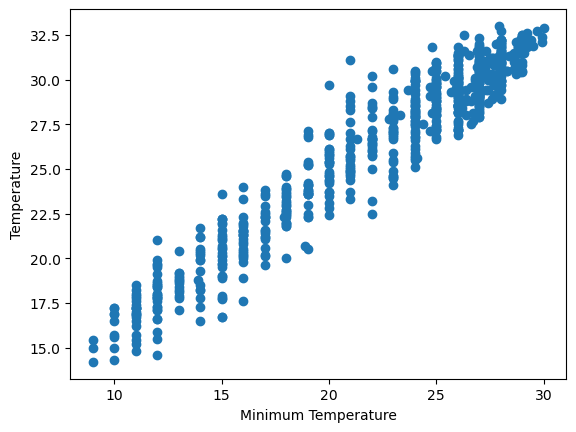

In [27]:
plt.scatter(weth.minTemp, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

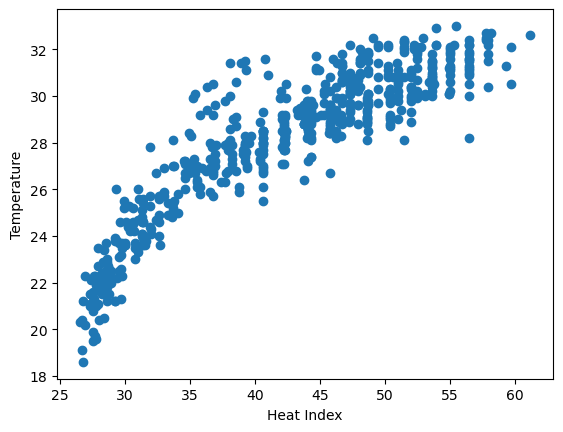

In [56]:

plt.scatter(weth.heatIndex, weth.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

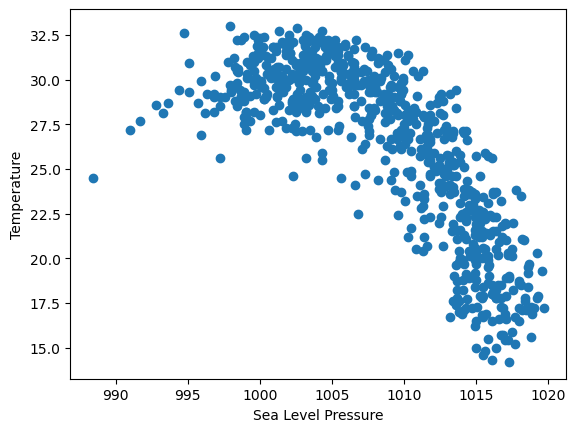

In [61]:
plt.scatter(weth.sealevelPressure, weth.tempC)
plt.xlabel("Sea Level Pressure")
plt.ylabel("Temperature")
plt.show()

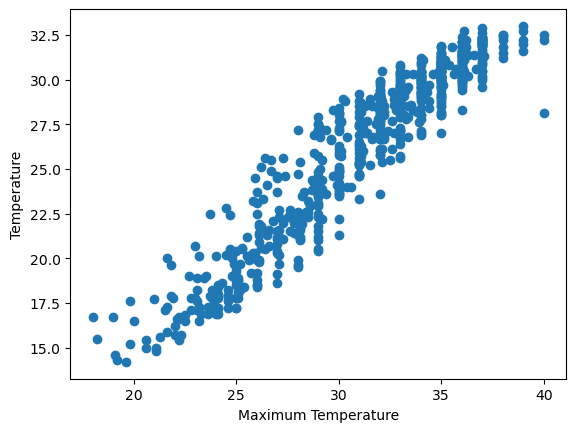

In [62]:
plt.scatter(weth.maxTemp, weth.tempC)
plt.xlabel("Maximum Temperature")
plt.ylabel("Temperature")
plt.show()

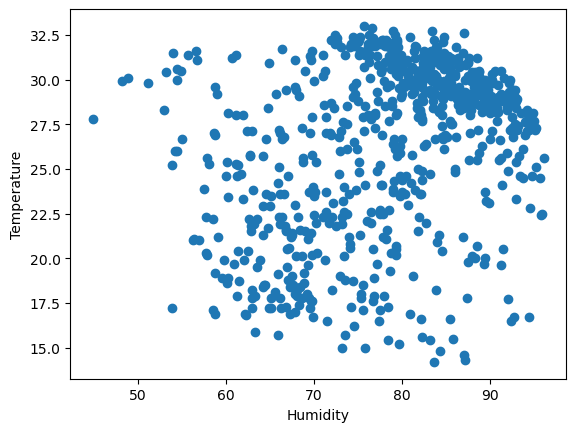

In [74]:
plt.scatter(weth.humidity, weth.tempC)
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.show()

In [28]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [29]:
prediction = model.predict(test_X)

In [30]:
#calculating error
np.mean(np.absolute(prediction-test_y))

0.19441131002704234

In [31]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.99


In [32]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
date_time,,,
2019-05-25,28.7,28.33,0.37
2017-06-07,32.0,32.07,-0.07
2019-02-12,20.3,20.11,0.19
2020-01-02,19.3,19.37,-0.07
2017-07-29,30.6,30.68,-0.08
...,...,...,...
2019-10-31,25.7,25.59,0.11
2022-12-10,22.6,22.83,-0.23
2017-12-04,20.5,20.91,-0.41


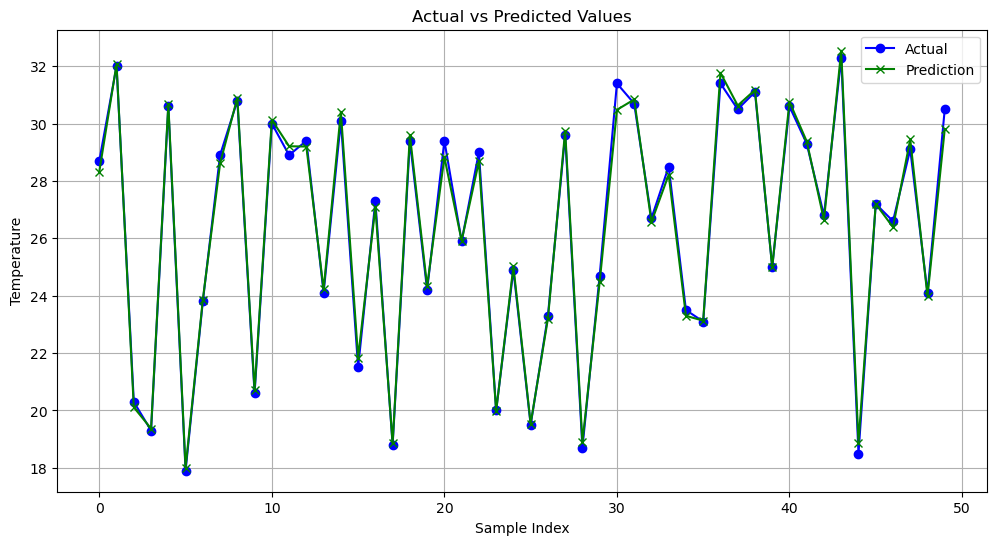

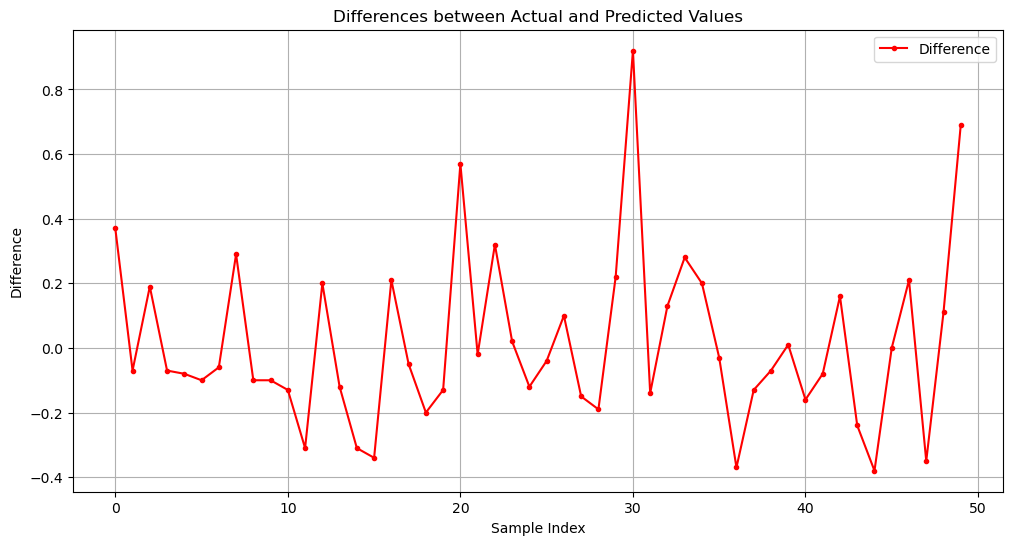

In [61]:
subset_size = min(50, len(test_y))  # Ensure the subset size is within the length of test_y
actual_subset = test_y.values[:subset_size]
prediction_subset = prediction[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(actual_subset, label='Actual', marker='o', color='blue')
plt.plot(prediction_subset, label='Prediction', marker='x', color='green')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot the differences with custom color
plt.figure(figsize=(12, 6))
plt.plot(actual_subset - prediction_subset, label='Difference', color='red', marker='.')
plt.title('Differences between Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree Regression 

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [34]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.45466970387243727

In [35]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.98


In [36]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
date_time,,,
2019-05-25,28.7,26.9,1.8
2017-06-07,32.0,31.7,0.3
2019-02-12,20.3,19.6,0.7
2020-01-02,19.3,18.4,0.9
2017-07-29,30.6,30.5,0.1
...,...,...,...
2019-10-31,25.7,25.8,-0.1
2022-12-10,22.6,23.1,-0.5
2017-12-04,20.5,20.6,-0.1


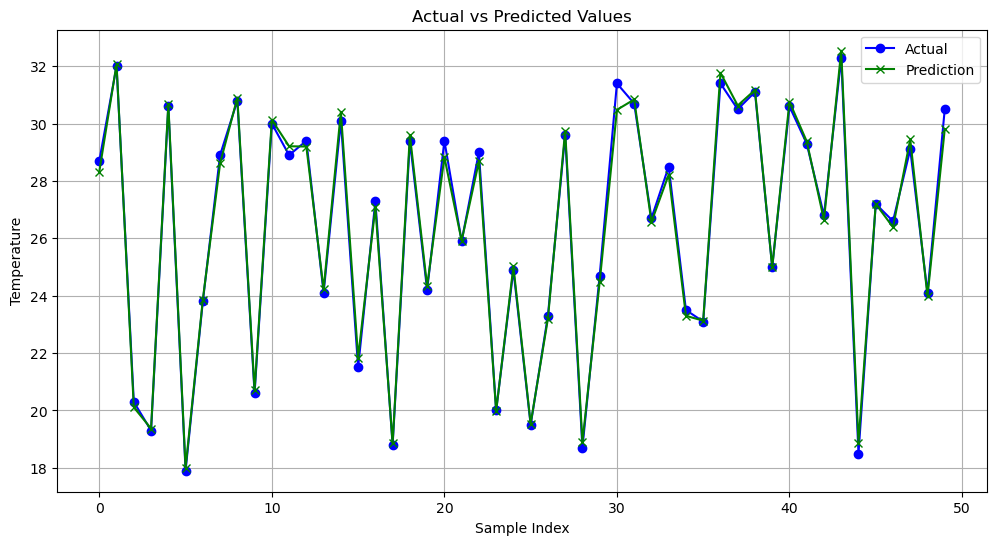

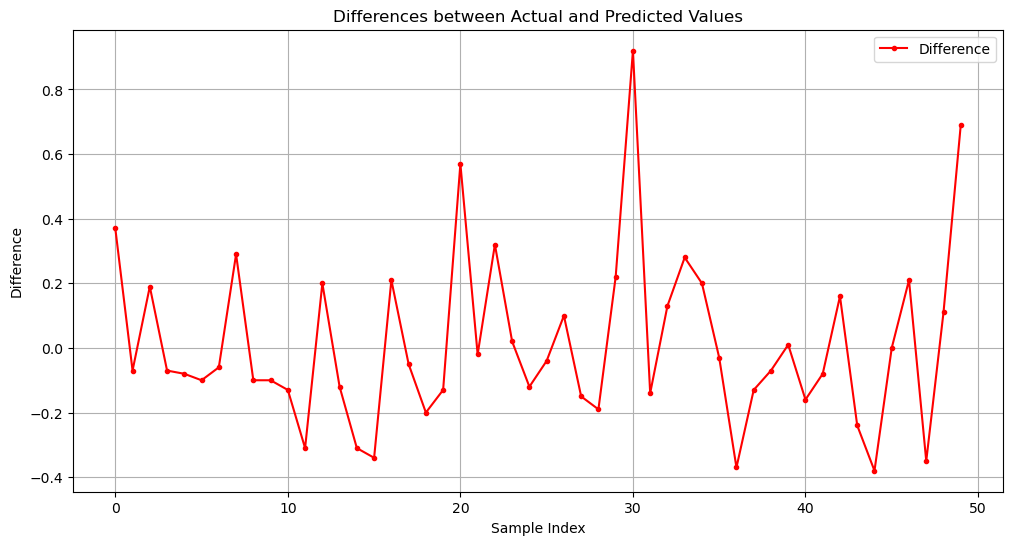

In [63]:
subset_size = min(50, len(test_y))  # Ensure the subset size is within the length of test_y
actual_subset = test_y.values[:subset_size]
prediction_subset = prediction2[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(actual_subset, label='Actual', marker='o', color='blue')
plt.plot(prediction_subset, label='Prediction', marker='x', color='green')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot the differences with custom color
plt.figure(figsize=(12, 6))
plt.plot(actual_subset - prediction_subset, label='Difference', color='red', marker='.')
plt.title('Differences between Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [38]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.3114646924829156

In [39]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.99


In [40]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date_time,,,
2019-05-25,28.7,27.41,1.29
2017-06-07,32.0,31.74,0.26
2019-02-12,20.3,20.08,0.22
2020-01-02,19.3,18.96,0.34
2017-07-29,30.6,30.27,0.33
...,...,...,...
2019-10-31,25.7,25.60,0.10
2022-12-10,22.6,22.54,0.06
2017-12-04,20.5,20.98,-0.48


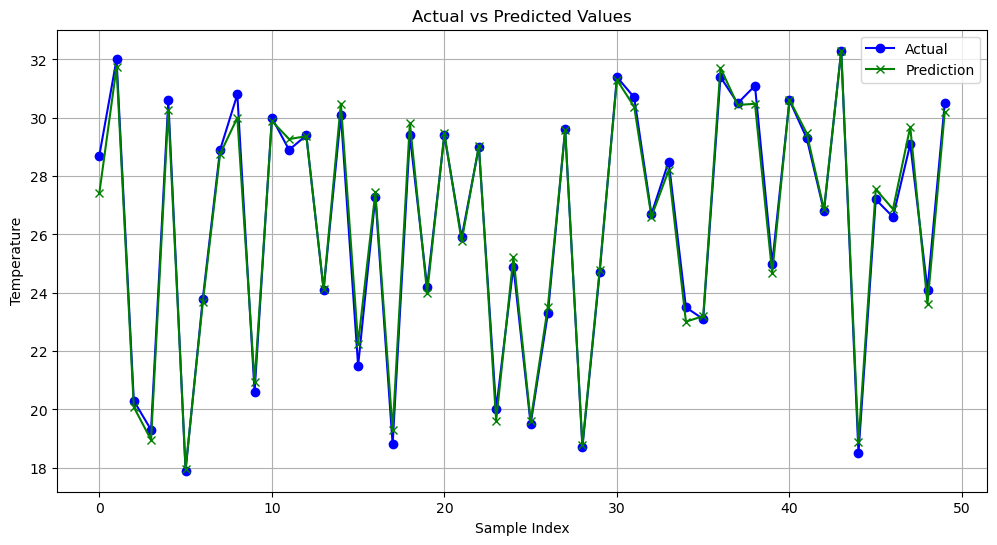

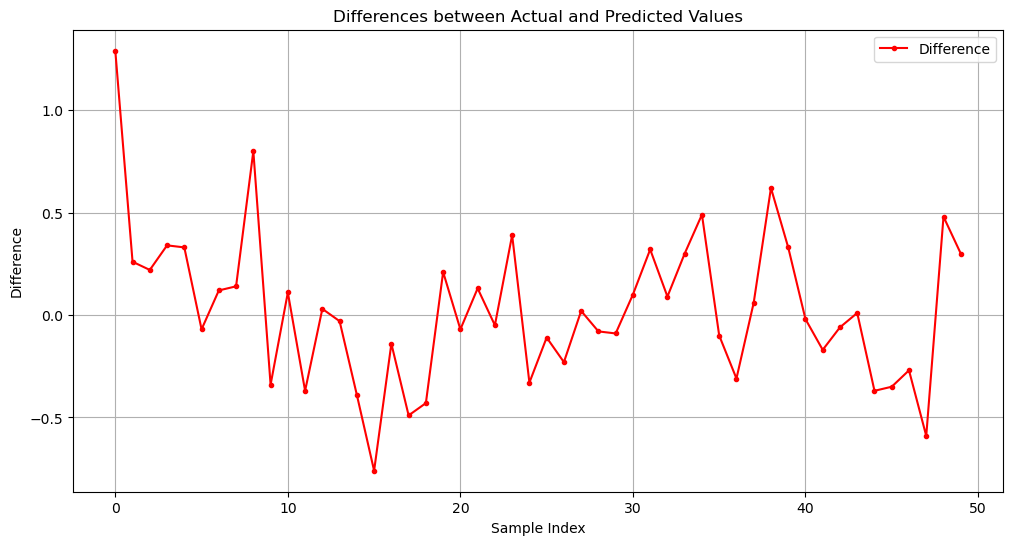

In [64]:
subset_size = min(50, len(test_y))  # Ensure the subset size is within the length of test_y
actual_subset = test_y.values[:subset_size]
prediction_subset = prediction3[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(actual_subset, label='Actual', marker='o', color='blue')
plt.plot(prediction_subset, label='Prediction', marker='x', color='green')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot the differences with custom color
plt.figure(figsize=(12, 6))
plt.plot(actual_subset - prediction_subset, label='Difference', color='red', marker='.')
plt.title('Differences between Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import r2_score

# Calculating R2-score for Multiple Linear Regression

In [42]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.19
Residual sum of squares (MSE): 0.20
R2-score: 0.99


# Calculating R2-score for Decision Tree Regression

In [43]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.45
Residual sum of squares (MSE): 0.35
R2-score: 0.98


# Calculating R2-score for Random Forest Regression

In [44]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.31
Residual sum of squares (MSE): 0.16
R2-score: 0.99
